<a href="https://colab.research.google.com/github/luciabarg/datos_tumoresferas/blob/main/G2/2_EyCD_Clasificacion_Tumoresferas_Grupo2_revision_Lu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Clasificación de Tumoresferas </h2>
</center>



<a name="exploratory_data_analysis"></a>
## **Práctico de Análisis Exploratorio y Curación**
  



Importamos las librerías necesarias:

In [66]:
#! pip install SQLAlchemy

In [67]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine, text

### Agrupaciones:

### SQL

Vamos a explorar los datos por medio de algunas consultas (queries) al archivo original (con el que trabajaron en el TP1):

 * Cargar el archivo *'data/raw/fiji_datos_0al7mo_labels.csv'* a SQLite.
 * Realizar las siguientes consultas:

    1) Verificar la cantidad de datos cargados (les debería dar 1018).
  
    2) Listar las primeras 7 líneas con las columnas *'Area'*, *'Round'* con alias *'redondez'*, *Diameter* con alias *'diametro'*, *n_diam* con alias  *poblacion_celular* y *esferoide*.
     
     Realizar la misma consulta pero filtrando por los días 3 y 5.
  
    3) Consultar los distintos días y aparte las etiquetas presentes. Contar cuántas filas hay por día y luego consultar cuantas son *esferoide = 'si'*.   
    
     Probar con GROUP BY de dos columnas si pueden contabilizar 'si' y 'no' por día.
    
    4 ) En algún día en particular (a partir del 3er día), consultar cuántos datos:
        
  * Son esferoides "si" y "no".        

  * Tienen su diámetro entre 50 $\mu$m y 200$\mu$ m.




#### Usando SQL en Python:

#### Cargar el archivo 'data/raw/fiji_datos_0al7mo_labels.csv' a SQLite.

In [68]:
# Para conectarse con sqlite:
engine = create_engine('sqlite:///fiji_datos.sqlite3', echo=False)

# Levantamos el archivo
url = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/raw/fiji_datos_0al7mo_labels.csv'
fiji_datos = pd.read_csv(url)

fiji_datos.to_sql('fiji_datos', con=engine, if_exists="replace")


1018

**[Lu]**

Si se poner 'echo=False' no tira tanta info que a veces no interesa

**[Lu]**

#### Realizar las siguientes consultas

##### $1.$ Verificar la cantidad de datos cargados

In [69]:
#Forma que les mostraron en la clase teórica:
query1 = "SELECT count(*) FROM fiji_datos;"

with engine.connect() as con:
    print(query1)
    rs = con.execute(text(query1))
    df_rs = pd.DataFrame(rs.fetchall())

df_rs

SELECT count(*) FROM fiji_datos;


,count(*)
0,1018


In [70]:
# Otra forma alternativa de usar sqlalchemy en Python

query1 = " SELECT count(*) FROM fiji_datos; "
with engine.connect() as con:
  query_result1 = pd.read_sql_query(text(query1), con)

query_result1

,count(*)
0,1018


##### También pueden usar la versión [**gráfica online**](https://sqliteonline.com/) de SQLite ([SQLite instructivo](https://drive.google.com/drive/folders/1iW5OaNaNDafU4e4m87xID7HcEbvb1W0V?usp=drive_link) )



Extras que podrían ayudar:

* Documentación [*pandas.DataFrame.to_sql*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_sql.html) y [*pandas.read_sql_query*](https://pandas.pydata.org/docs/reference/api/pandas.read_sql_query.html).

* [Recursos SQL](https://drive.google.com/drive/folders/1EDSgMGbrRjNZX7m-GXunkQjNXUxY1NSn?usp=drive_link).
    
* Presentación en [MeTCamp](https://docs.google.com/presentation/d/1URSQt1sJ8Th8Y4J62zBv9x3I1lV0rckT/edit?usp=sharing&ouid=107018266094379471830&rtpof=true&sd=true).

* Súper súper buenas prácticas en [este repositorio](https://github.com/daianadte/wids-cba-2023).

##### $2.$ Listar las primeras 7 líneas con las columnas 'Area', 'Round' con alias 'redondez', Diameter con alias 'diametro', n_diam con alias poblacion_celular y esferoide. Realizar la misma consulta pero filtrando por los días 3 y 5.

In [71]:
query2 = "SELECT Area, Round AS redondez, Diameter AS diametro, n_diam AS poblacion_celular, esferoide FROM fiji_datos LIMIT 7;"
with engine.connect() as con:
  query_result2 = pd.read_sql_query(text(query2), con)

query_result2

,Area,redondez,diametro,poblacion_celular,Esferoide
0,324.4440,0.9387,20.95640,1.491357,si
1,497.5115,0.9546,26.00200,2.848733,si
2,282.9078,0.9620,19.38970,1.181258,si
3,500.7421,0.9730,25.88475,2.810370,si
4,492.8964,0.9817,25.33985,2.636596,si
5,406.1319,0.9533,23.27125,2.042164,si
6,333.6742,0.9496,20.80470,1.459204,si


Consulta filtrando por los días 3 y 5.

In [72]:
query3 = "SELECT Area, Round AS redondez, Diameter AS diametro, n_diam AS poblacion_celular, esferoide FROM fiji_datos WHERE dia IN (3, 5) LIMIT 7;"
with engine.connect() as con:
  query_result3 = pd.read_sql_query(text(query3), con)

query_result3

,Area,redondez,diametro,poblacion_celular,Esferoide
0,4635.9028,0.8392,78.82640,79.368212,si
1,5901.8342,0.9533,87.74420,109.467897,si
2,11259.0826,0.9699,122.97820,301.381032,si
3,22344.1746,0.7434,173.24380,842.567345,si
4,2700.3153,0.6096,63.88875,42.257587,no
5,5002.3445,0.8306,84.09790,96.380011,si
6,14646.5914,0.5600,164.88585,726.409779,no


##### $3.$ Consultar los distintos días y aparte las etiquetas presentes. Contar cuántas filas hay por día y luego consultar cuantas son esferoide = 'si'. Probar con GROUP BY de dos columnas si pueden contabilizar 'si' y 'no' por día.


In [73]:
# Consultamos las etiquetas presentes en la columna dia
query4 = "SELECT DISTINCT dia FROM fiji_datos;"
with engine.connect() as con:
  query_result4 = pd.read_sql_query(text(query4), con)

# Contamos cuántas filas hay por día
query5 = "SELECT dia, COUNT(*) AS total FROM fiji_datos GROUP BY dia;"
with engine.connect() as con:
  query_result5 = pd.read_sql_query(text(query5), con)

# Contamos cuántas filas hay por día para esferoides = 'si'
query6 = "SELECT dia, COUNT(*) AS total FROM fiji_datos WHERE esferoide = 'si' GROUP BY dia;"
with engine.connect() as con:
  query_result6 = pd.read_sql_query(text(query6), con)

# Hacemos un group by de esferoides y dia
query7 = "SELECT dia, esferoide, COUNT(*) AS total FROM fiji_datos GROUP BY dia, esferoide;"
with engine.connect() as con:
  query_result7 = pd.read_sql_query(text(query7), con)

###### Etiquetas presentes en la columna dia

In [74]:
query_result4

,dia
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7


###### Filas por día

In [75]:
query_result5

,dia,total
0,0,94
1,1,342
2,2,155
3,3,43
4,4,254
5,5,52
6,6,4
7,7,74


###### Filas que hay por día para esferoides = 'si'

In [76]:
query_result6

,dia,total
0,0,74
1,1,253
2,2,70
3,3,18
4,4,48
5,5,28
6,6,2
7,7,29


###### Group by de esferoides y dia

In [77]:
query_result7

,dia,Esferoide,total
0,0,no,20
1,0,si,74
2,1,no,89
3,1,si,253
4,2,no,85
5,2,si,70
6,3,no,25
7,3,si,18
8,4,no,206
9,4,si,48


##### $4.$ En algún día en particular (a partir del 3er día), consultar cuántos datos:
   * Son esferoides "si" y "no".

   * Tienen su diámetro entre 50 $\mu$m y 200$\mu$ m.


In [78]:
# Seleccionamos el dia 4 y contamos cuantos son esferoides si y no
query8 = "SELECT dia, esferoide, COUNT(*) AS total FROM fiji_datos WHERE dia = 4 GROUP BY esferoide;"
with engine.connect() as con:
  query_result8 = pd.read_sql_query(text(query8), con)

# Seleccionamos el dia 4 y filtramos en un rango para el diámetro
query9 = "SELECT dia, Diameter, COUNT(*) AS total FROM fiji_datos WHERE dia = 4 AND Diameter BETWEEN 50 AND 200;"
with engine.connect() as con:
  query_result9 = pd.read_sql_query(text(query9), con)
#print("\nQuery 9:")
#print(query_result9)


###### Día 4 cantidad de esferoides si y no

In [79]:
query_result8

,dia,Esferoide,total
0,4,no,206
1,4,si,48


###### Día 4, filtrado para los diámetros entre 50 $\mu$m y 200$\mu$ m.

In [80]:
query_result9

,dia,Diameter,total
0,4,92.6425,80


In [81]:
#cerramos la conexión
con.close()

#### Python

Probar diferentes agrupaciones en Python.

##### Cantidad de datos por dia

In [82]:
fiji_datos.groupby('dia').agg({'Esferoide': ['count']}).sort_values(by = 'dia')

,Esferoide
,count
dia,
0,94
1,342
2,155
3,43
4,254
5,52
6,4
7,74


In [83]:
fiji_datos['dia'].value_counts().sort_index()

0     94
1    342
2    155
3     43
4    254
5     52
6      4
7     74
Name: dia, dtype: int64

##### Agrupo por 'Esferoide' = 'no' y 'Esferoide' = 'si'

In [84]:
fiji_datos.groupby('Esferoide').size().reset_index(name='total')

,Esferoide,total
0,no,496
1,si,522


##### Agrupo por dia teniendo en cuenta 'Esferoide' = 'no' y 'Esferoide' = 'si'

In [85]:
fiji_datos.groupby(['dia', 'Esferoide']).size().reset_index(name='total')

,dia,Esferoide,total
0,0,no,20
1,0,si,74
2,1,no,89
3,1,si,253
4,2,no,85
5,2,si,70
6,3,no,25
7,3,si,18
8,4,no,206
9,4,si,48


### Análisis y Curación de Datos

1) Para empezar a trabajar la tabla, primero hay que combinar los datasets, que fueron separados por día.

Estos son los siguientes archivos a unir:

*   "fiji_datos_0al7mo_modificado_dia_0.csv"
*   "fiji_datos_0al7mo_modificado_dia_1.csv"
*   "fiji_datos_0al7mo_modificado_dia_2.csv"
*   "fiji_datos_0al7mo_modificado_dia_3.csv"
*   "fiji_datos_0al7mo_modificado_dia_4.csv"
*   "fiji_datos_0al7mo_modificado_dia_5.csv"
*   "fiji_datos_0al7mo_modificado_dia_6.csv"
*   "fiji_datos_0al7mo_modificado_dia_7a.csv"
*   "fiji_datos_0al7mo_modificado_dia_7b.csv"

Se encuentran en la carpeta: **"data/02_EyC"** de la [carpeta compartida](https://drive.google.com/drive/folders/1RqGNySwACN33Qopmw0nHmj5Yv4M78ZXi?usp=drive_link) y en este repositorio.


Probar hacerlo con Python y/o SQL (por separado, para probar!). Verificar que llegan a la misma cantidad de filas y columnas.

2) Una vez armado el dataset modificado, explorar el dataset y buscar inconsistencias, por ej si hay valores nulos, duplicados, etc, tratando de encontrar todas las inconsistencias en los datos. Decidir el orden en cuál ir arreglándolas.

3) Corregir las inconsistencias que van encontrando y sobre los datos faltantes (¡verificar primero si los hay!), determinar cuál método sería el mas adecuado para imputarlos, teniendo en cuenta lo que aprendieron sobre los datos en el práctico de *Análisis y Visualización*.

4) Una vez que recuperan el dataset original, repasando lo que les dieron en la materia de *Exploración y Curación de datos* y ya pensando en las transformaciones que puedan servirles y que les conviene realizar para la clasificación en el práctico de aprendizaje supervisado:

  * ¿Sobre cuáles columnas realizarían encoding y de qué tipo?. Elegir un método e implementarlo.

  * Tenemos muchas columnas (¡aunque siempre puede haber mas!) por lo que es posible realizar algún método de reducción de dimensionalidad.

  * Escalar y/o normalizar? Esa es la cuestión. Teniendo en cuenta lo aprendido a partir de los datos, cuál método se ajustaría a estos datos?

  Sumar tales transformaciones como columnas para sumar características al conjunto de datos y guardar el achivo modificado.

Si se traban mucho mucho en la limpieza de los datos, este paso pueden hacerlo con el dataset original que usaron en el práctico 1.

5) Pueden identificar sesgos en la toma de los datos o en el etiquetado? Si les parece que es así, cómo sería un experimento o método para mejorarlos?  

6) Realizar una documentación técnica de los procesos realizados.




##### $1.$ Combinación de dataset
En primer lugar importamos los datasets.

In [86]:
#fiji_datos_0 = pd.read_csv("data/02_EyC/fiji_datos_0al7mo_modificado_dia_0.csv", sep=";") #unnamed
#fiji_datos_1 = pd.read_csv("data/02_EyC/fiji_datos_0al7mo_modificado_dia_1.csv")
#fiji_datos_2 = pd.read_csv("data/02_EyC/fiji_datos_0al7mo_modificado_dia_2.csv", sep=";")
#fiji_datos_3 = pd.read_csv("data/02_EyC/fiji_datos_0al7mo_modificado_dia_3.csv", sep=";") #unnamed
#fiji_datos_4 = pd.read_csv("data/02_EyC/fiji_datos_0al7mo_modificado_dia_4.csv", sep=":")
#fiji_datos_5 = pd.read_csv("data/02_EyC/fiji_datos_0al7mo_modificado_dia_5.csv", sep=";")
#fiji_datos_6 = pd.read_csv("data/02_EyC/fiji_datos_0al7mo_modificado_dia_6.csv")
#fiji_datos_7a = pd.read_csv("data/02_EyC/fiji_datos_0al7mo_modificado_dia_7a.csv") #unnamed
#fiji_datos_7b = pd.read_csv("data/02_EyC/fiji_datos_0al7mo_modificado_dia_7b.csv", sep=";") #unnamed

In [88]:
# Visualizamos las columnas que tiene el dataset de cada día
print(fiji_datos_0.columns,"\n")
print(fiji_datos_1.columns,"\n")
print(fiji_datos_2.columns,"\n")
print(fiji_datos_3.columns,"\n")
print(fiji_datos_4.columns,"\n")
print(fiji_datos_5.columns,"\n")
print(fiji_datos_6.columns,"\n")
print(fiji_datos_7a.columns,"\n")
print(fiji_datos_7b.columns)

Index(['Unnamed: 0', 'labels', 'Area', 'X', 'Y', 'XM', 'YM', 'Perim.', 'BX',
       'BY', 'Width', 'Height', 'Circ.', 'Feret', 'FeretX', 'FeretY',
       'FeretAngle', 'MinFeret', 'AR', 'Round', 'Solidity', 'Esferoide', 'dia',
       'Diameter', 'n_diam'],
      dtype='object') 

Index(['labels', 'Area', 'X', 'Y', 'XM', 'YM', 'Perim.', 'BX', 'BY', 'Width',
       'Height', 'Circ.', 'Feret', 'FeretX', 'FeretY', 'FeretAngle',
       'MinFeret', 'AR', 'Round', 'Solidity', 'Esferoide', 'dia', 'Diameter',
       'n_diam'],
      dtype='object') 

Index(['labels', 'Area', 'X', 'Y', 'XM', 'YM', 'Perim.', 'BX', 'BY', 'Width',
       'Height', 'Circ.', 'Feret', 'FeretX', 'FeretY', 'FeretAngle',
       'MinFeret', 'AR', 'Round', 'Solidity', 'Esferoide', 'dia', 'Diameter',
       'n_diam'],
      dtype='object') 

Index(['Unnamed: 0', 'labels', 'Area', 'X', 'Y', 'XM', 'YM', 'Perim.', 'BX',
       'BY', 'Width', 'Height', 'Circ.', 'Feret', 'FeretX', 'FeretY',
       'FeretAngle', 'MinFeret', 'AR',

In [89]:
# Observamos la columna Unnamed para el caso de fiji_datos_0
fiji_datos_0.head()

,Unnamed: 0,labels,Area,X,Y,XM,YM,Perim.,BX,BY,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,49,Esferas_BT474_dia_0_well_2_100X_1_blob_34,315.6752,1027.9715,694.7215,1027.9715,694.7215,65.6036,1017.6630,684.7826,...,1009,114.1455,20.1583,1.0130,0.9871,0.9513,si,0,20.87415,1.473866
1,6,Esferas_BT474_dia_0_well_1_100X_1_blob_8,333.6742,1123.7169,318.7621,1123.7169,318.7621,67.3603,1112.7717,309.1033,...,470,7.1250,19.7011,1.0531,0.9496,0.9557,si,0,20.80470,1.459204
2,27,Esferas_BT474_dia_0_well_2_100X_1_blob_3,505.3572,1649.6734,26.9633,1649.6734,26.9633,85.2847,1636.5489,14.2663,...,21,105.3763,25.5245,1.0173,0.9830,0.9387,si,0,26.85360,3.137900
3,78,Esferas_BT474_dia_0_well_2_100X_1_blob_8,874.1065,1596.3056,145.1846,1596.3056,145.1846,130.8776,1583.5598,123.6413,...,247,78.6901,25.8152,1.9705,0.5075,0.8983,no,0,35.42365,7.202967
4,41,Esferas_BT474_dia_0_well_2_100X_1_blob_23,302.7528,130.9940,453.8447,130.9940,453.8447,64.4780,121.6033,443.6141,...,682,61.8214,19.0217,1.0803,0.9256,0.9473,si,0,20.30050,1.355663


'fiji_datos_0', 'fiji_datos_3', 'fiji_datos_7a' y 'fiji_datos_7b' tienen una columna sin nombre que decidimos eliminar.

In [90]:
# Eliminamos la columna Unnamed
fiji_datos_0_clean = fiji_datos_0.drop(columns=['Unnamed: 0']).copy()
fiji_datos_3_clean = fiji_datos_3.drop(columns=['Unnamed: 0']).copy()
fiji_datos_7a_clean = fiji_datos_7a.drop(columns=['Unnamed: 0']).copy()
fiji_datos_7b_clean = fiji_datos_7b.drop(columns=['Unnamed: 0']).copy()

# Observamos que se haya eliminado la columna para el caso de fiji_datos_0_clean
fiji_datos_0_clean.head()

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_0_well_2_100X_1_blob_34,315.6752,1027.9715,694.7215,1027.9715,694.7215,65.6036,1017.6630,684.7826,20.3804,...,1009,114.1455,20.1583,1.0130,0.9871,0.9513,si,0,20.87415,1.473866
1,Esferas_BT474_dia_0_well_1_100X_1_blob_8,333.6742,1123.7169,318.7621,1123.7169,318.7621,67.3603,1112.7717,309.1033,21.7391,...,470,7.1250,19.7011,1.0531,0.9496,0.9557,si,0,20.80470,1.459204
2,Esferas_BT474_dia_0_well_2_100X_1_blob_3,505.3572,1649.6734,26.9633,1649.6734,26.9633,85.2847,1636.5489,14.2663,25.8152,...,21,105.3763,25.5245,1.0173,0.9830,0.9387,si,0,26.85360,3.137900
3,Esferas_BT474_dia_0_well_2_100X_1_blob_8,874.1065,1596.3056,145.1846,1596.3056,145.1846,130.8776,1583.5598,123.6413,25.8152,...,247,78.6901,25.8152,1.9705,0.5075,0.8983,no,0,35.42365,7.202967
4,Esferas_BT474_dia_0_well_2_100X_1_blob_23,302.7528,130.9940,453.8447,130.9940,453.8447,64.4780,121.6033,443.6141,19.0217,...,682,61.8214,19.0217,1.0803,0.9256,0.9473,si,0,20.30050,1.355663


Verificamos las dimensiones de los datasets para unirlos

In [91]:
fiji_datos_df = [fiji_datos_0_clean, fiji_datos_1, fiji_datos_2, fiji_datos_3_clean, fiji_datos_4, fiji_datos_5,
                 fiji_datos_6, fiji_datos_7a_clean,fiji_datos_7b_clean]

for i, df in enumerate(fiji_datos_df):
    if i == 7:
        dia = "7a"
    elif i == 8:
        dia = "7b"
    else:
        dia = str(i)
    print("Día " + dia)
    print("Shape:", df.shape)
    print('')

Día 0
Shape: (110, 24)

Día 1
Shape: (395, 24)

Día 2
Shape: (172, 24)

Día 3
Shape: (50, 24)

Día 4
Shape: (295, 24)

Día 5
Shape: (57, 24)

Día 6
Shape: (4, 24)

Día 7a
Shape: (88, 12)

Día 7b
Shape: (88, 13)



Analizaremos el día 7 dado que la cantidad de columnas es menor que el resto de los días.

In [92]:
print(fiji_datos_7a_clean.columns,'\n')
print(fiji_datos_7b_clean.columns)

Index(['labels', 'Area', 'X', 'Y', 'XM', 'YM', 'Perim.', 'BX', 'BY', 'Width',
       'Height', 'Circ.'],
      dtype='object') 

Index(['labels', 'Feret', 'FeretX', 'FeretY', 'FeretAngle', 'MinFeret', 'AR',
       'Round', 'Solidity', 'Esferoide', 'dia', 'Diameter', 'n_diam'],
      dtype='object')


In [93]:
fiji_datos_7a_clean.head(10)

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,Height,Circ.
0,Esferas_BT474_dia_7_well_2_100X_1_blob_11,107.5326,653.1142,517.3525,653.1142,517.3525,38.4014,646.7391,511.5489,12.2283,11.5489,0.9163
1,Esferas_BT474_dia_7_well_2_100X_5_blob_5,435.6687,122.7770,446.2430,122.7770,446.2430,77.6671,112.0924,433.4239,20.3804,25.8152,0.9076
2,Esferas_BT474_dia_7_well_2_100X_3_blob_3,334.1358,774.1384,193.5513,774.1384,193.5513,69.5832,762.2283,185.4620,23.7772,16.9837,0.8672
3,Esferas_BT474_dia_7_well_1_100X_8_blob_3,3145.2143,477.0000,293.5050,477.0000,293.5050,249.8966,436.8207,264.9457,78.8043,54.3478,0.6329
4,Esferas_BT474_dia_7_well_1_100X_3_blob_1,381.6716,577.3664,277.3123,577.3664,277.3123,73.1930,566.5761,266.3043,21.7391,22.4185,0.8953
5,Esferas_BT474_dia_7_well_1_100X_4_blob_5,263.5242,619.0661,515.2389,619.0661,515.2389,60.4020,609.3750,506.1141,19.0217,18.3424,0.9077
6,Esferas_BT474_dia_7_well_1_100X_7_blob_1,7295.6049,515.9838,169.9114,515.9838,169.9114,331.9294,467.3913,120.2446,97.8261,99.8641,0.8321
7,Esferas_BT474_dia_7_well_2_100X_3_blob_4,5724.6131,489.5962,542.4306,489.5962,542.4306,289.6567,447.6902,493.8859,80.1630,93.7500,0.8574
8,Esferas_BT474_dia_7_well_2_100X_5_blob_3,5466.1655,646.4804,378.4575,646.4804,378.4575,281.1066,605.2989,334.9185,83.5598,86.2772,0.8693
9,Esferas_BT474_dia_7_well_1_100X_7_blob_3,436.1302,89.7152,510.2610,89.7152,510.2610,80.7141,77.4457,499.3207,25.1359,22.4185,0.8413


In [94]:
fiji_datos_7b_clean.head(10)

,labels,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_7_well_2_100X_1_blob_11,13.0675,957,753,117.8973,11.5336,1.1275,0.8869,0.9301,no,7,12.30055,0.301582
1,Esferas_BT474_dia_7_well_2_100X_5_blob_5,27.0718,176,638,107.5256,20.3804,1.2472,0.8018,0.9657,no,7,23.72610,2.164266
2,Esferas_BT474_dia_7_well_2_100X_3_blob_3,24.5507,1122,282,165.5792,16.9837,1.3648,0.7327,0.9602,no,7,20.76720,1.451327
3,Esferas_BT474_dia_7_well_1_100X_8_blob_3,79.0412,643,435,175.5635,52.1486,1.5889,0.6294,0.9155,no,7,65.59490,45.734269
4,Esferas_BT474_dia_7_well_1_100X_3_blob_1,25.1450,838,423,51.5819,21.4829,1.1471,0.8718,0.9550,no,7,23.31395,2.053426
5,Esferas_BT474_dia_7_well_1_100X_4_blob_5,20.1985,897,762,19.6538,18.1165,1.0292,0.9716,0.9399,no,7,19.15750,1.139326
6,Esferas_BT474_dia_7_well_1_100X_7_blob_1,107.3649,697,200,131.1518,89.3491,1.1772,0.8495,0.9725,si,7,98.35700,154.186852
7,Esferas_BT474_dia_7_well_2_100X_3_blob_4,94.7294,709,865,81.7537,80.1630,1.1351,0.8810,0.9757,si,7,87.44620,108.356345
8,Esferas_BT474_dia_7_well_2_100X_5_blob_3,89.6765,913,504,127.3039,79.2953,1.1254,0.8886,0.9766,si,7,84.48590,97.720172
9,Esferas_BT474_dia_7_well_1_100X_7_blob_3,27.1484,116,763,31.7014,21.4626,1.2114,0.8255,0.9450,no,7,24.30550,2.326726


Al parecer, viendo la columna labels, los primeros diez datos de los dataset del dia 7a y 7b tienen las mismas etiquetas con distintas columnas

In [95]:
# Veamos primero la intersección
labels_7a = set(fiji_datos_7a_clean["labels"])
labels_7b = set(fiji_datos_7b_clean["labels"])

registros_en_comun = labels_7a.intersection(labels_7b)
registros_diferentes = labels_7a.symmetric_difference(labels_7b)

print("Cantidad de registros en común:", len(registros_en_comun))
print("Cantidad de registros diferentes:", len(registros_diferentes))

Cantidad de registros en común: 74
Cantidad de registros diferentes: 0


In [96]:
fiji_datos_7a_clean.shape, fiji_datos_7b_clean.shape

((88, 12), (88, 13))

Al ver que la cantidad de registros en común son 74 y que la cantidad de registros diferentes es 0, siendo que la dimension de los dataset es de 88 registros, podemos concluir que hay registros duplicados en los dataset.

Corroboramos que hay valores duplicados en cada dataset

In [97]:
duplicados = fiji_datos_7a_clean.duplicated(subset=fiji_datos_7a_clean.columns, keep="last")
cantidad_duplicados = duplicados.sum()

print("Cantidad de registros duplicados:", cantidad_duplicados)

Cantidad de registros duplicados: 14


In [98]:
duplicados = fiji_datos_7b_clean.duplicated(subset=fiji_datos_7b_clean.columns, keep="last")
cantidad_duplicados = duplicados.sum()

print("Cantidad de registros duplicados:", cantidad_duplicados)

Cantidad de registros duplicados: 14


Dado que la intersección entre fiji_datos_7a_clean y fiji_datos_7b_clean es 74 pero la dimensión es 88, parecería que tenemos algunos registros duplicados. Veamos la cantidad de entradas para el día 7 en el dataset original.

In [99]:
# Cantidad de registros para dia = 7 en el df original.
cantidad_registros_dia_7 = sum(fiji_datos["dia"] == 7)
cantidad_registros_dia_7

74

Debido a que tenemos 14 registros duplicados. Primero los eliminamos y luego realizamos un merge de los dos dataset para el dia 7.

In [100]:
# Eliminamos los registros duplicados
fiji_datos_7a_clean = fiji_datos_7a_clean.drop_duplicates()
fiji_datos_7b_clean = fiji_datos_7b_clean.drop_duplicates()

In [101]:
duplicados = fiji_datos_7a_clean.duplicated(subset=fiji_datos_7a_clean.columns, keep="last")
cantidad_duplicados = duplicados.sum()

print("Cantidad de registros duplicados:", cantidad_duplicados)

Cantidad de registros duplicados: 0


In [102]:
duplicados = fiji_datos_7b_clean.duplicated(subset=fiji_datos_7b_clean.columns, keep="last")
cantidad_duplicados = duplicados.sum()

print("Cantidad de registros duplicados:", cantidad_duplicados)

Cantidad de registros duplicados: 0


In [103]:
# Hacemos un merge de fiji_datos_7a_clean y fiji_datos_7b_clean a partir de la columna labels
fiji_datos_7 = fiji_datos_7a_clean.merge(fiji_datos_7b_clean, on="labels", how="inner")
fiji_datos_7.head()

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_7_well_2_100X_1_blob_11,107.5326,653.1142,517.3525,653.1142,517.3525,38.4014,646.7391,511.5489,12.2283,...,753,117.8973,11.5336,1.1275,0.8869,0.9301,no,7,12.30055,0.301582
1,Esferas_BT474_dia_7_well_2_100X_5_blob_5,435.6687,122.7770,446.2430,122.7770,446.2430,77.6671,112.0924,433.4239,20.3804,...,638,107.5256,20.3804,1.2472,0.8018,0.9657,no,7,23.72610,2.164266
2,Esferas_BT474_dia_7_well_2_100X_3_blob_3,334.1358,774.1384,193.5513,774.1384,193.5513,69.5832,762.2283,185.4620,23.7772,...,282,165.5792,16.9837,1.3648,0.7327,0.9602,no,7,20.76720,1.451327
3,Esferas_BT474_dia_7_well_1_100X_8_blob_3,3145.2143,477.0000,293.5050,477.0000,293.5050,249.8966,436.8207,264.9457,78.8043,...,435,175.5635,52.1486,1.5889,0.6294,0.9155,no,7,65.59490,45.734269
4,Esferas_BT474_dia_7_well_1_100X_3_blob_1,381.6716,577.3664,277.3123,577.3664,277.3123,73.1930,566.5761,266.3043,21.7391,...,423,51.5819,21.4829,1.1471,0.8718,0.9550,no,7,23.31395,2.053426


In [104]:
# Verificamos que nuestro nuevo dataset, tenga 24 columnas como los df del resto de los días y [74 registros, como en el df original.]
fiji_datos_7.shape

(74, 24)

In [105]:
# redefinimos fiji_datos_df
fiji_datos_df = [fiji_datos_0_clean, fiji_datos_1, fiji_datos_2, fiji_datos_3_clean, fiji_datos_4, fiji_datos_5,
                 fiji_datos_6, fiji_datos_7]

#Eliminamos duplicados en los df
for i, df in enumerate(fiji_datos_df):
    fiji_datos_df[i] = df.drop_duplicates()

# Concatenamos los df en fiji_datos_df
fiji_datos_concat = pd.concat(fiji_datos_df).reset_index(drop=True)
print('fiji_datos_concat.shape', fiji_datos_concat.shape)
fiji_datos_concat.head()

fiji_datos_concat.shape (1023, 24)


,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_0_well_2_100X_1_blob_34,315.6752,1027.9715,694.7215,1027.9715,694.7215,65.6036,1017.6630,684.7826,20.3804,...,1009,114.1455,20.1583,1.0130,0.9871,0.9513,si,0,20.87415,1.473866
1,Esferas_BT474_dia_0_well_1_100X_1_blob_8,333.6742,1123.7169,318.7621,1123.7169,318.7621,67.3603,1112.7717,309.1033,21.7391,...,470,7.1250,19.7011,1.0531,0.9496,0.9557,si,0,20.80470,1.459204
2,Esferas_BT474_dia_0_well_2_100X_1_blob_3,505.3572,1649.6734,26.9633,1649.6734,26.9633,85.2847,1636.5489,14.2663,25.8152,...,21,105.3763,25.5245,1.0173,0.9830,0.9387,si,0,26.85360,3.137900
3,Esferas_BT474_dia_0_well_2_100X_1_blob_8,874.1065,1596.3056,145.1846,1596.3056,145.1846,130.8776,1583.5598,123.6413,25.8152,...,247,78.6901,25.8152,1.9705,0.5075,0.8983,no,0,35.42365,7.202967
4,Esferas_BT474_dia_0_well_2_100X_1_blob_23,302.7528,130.9940,453.8447,130.9940,453.8447,64.4780,121.6033,443.6141,19.0217,...,682,61.8214,19.0217,1.0803,0.9256,0.9473,si,0,20.30050,1.355663


**[Lu]**            Inicio de comentarios sobre SQL        **[Lu]**


Wiii genial el análisis :). Y que se dieron cuenta que tenían distintos separadores de columnas :).

Solo para que sepan, si cuando levantan un csv les aparece la columna "Unnamed", si indican lo siguiente:

    df = pd.read_csv('nombre.csv', sep=';', index_col = 0)

esa columna no se genera. Igual está súper bien como lo trabajaron.
Sobre el merge del día 7, podrían haber visualizado los duplicados y ver si tenian los mismos labels, pero estuvo bien igual.






In [106]:
dia0_df = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_0.csv', sep=';', index_col = 0)
dia1_df = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_1.csv', sep=',')
dia2_df = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_2.csv', sep=';')
dia3_df = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_3.csv', sep=';',index_col = 0)
dia4_df = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_4.csv', sep=':')
dia5_df = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_5.csv', sep=';')
dia6_df = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_6.csv', sep=',')
dia7a_df = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_7a.csv', sep=',',index_col = 0)
dia7b_df = pd.read_csv('https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/02_EyC/fiji_datos_0al7mo_modificado_dia_7b.csv', sep=';',index_col = 0)

In [107]:
dia7a_df.head(2)

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,Height,Circ.
1000,Esferas_BT474_dia_7_well_2_100X_1_blob_11,107.5326,653.1142,517.3525,653.1142,517.3525,38.4014,646.7391,511.5489,12.2283,11.5489,0.9163
1015,Esferas_BT474_dia_7_well_2_100X_5_blob_5,435.6687,122.7770,446.2430,122.7770,446.2430,77.6671,112.0924,433.4239,20.3804,25.8152,0.9076


Acá podemos intentar lo que les comentaba de SQL. Como les comenté al principio, para manipularlos en la notebook estamos levantando los archivos desde una url con pandas (con *df = pd.read_csv(url)*).

Para manipularlos con SQL, toca pasarlos como tablas a la base de datos (haciendo *df.to_sql*) para poder usarlos en queries:


In [108]:
dfs = [dia0_df, dia1_df, dia2_df, dia3_df, dia4_df, dia5_df, dia6_df, dia7a_df, dia7b_df]
tables_names = ['dia0_sql', 'dia1_sql', 'dia2_sql', 'dia3_sql', 'dia4_sql', 'dia5_sql', 'dia6_sql', 'dia7a_sql', 'dia7b_sql']

for df, table in zip (dfs, tables_names):
  print('dia:', table)
  df.to_sql(f'{table}', con=engine, if_exists="replace", index = False)


dia: dia0_sql
dia: dia1_sql
dia: dia2_sql
dia: dia3_sql
dia: dia4_sql
dia: dia5_sql
dia: dia6_sql
dia: dia7a_sql
dia: dia7b_sql


Veremos los días 7a y 7b,que como vieron, se pueden joinear por la columna 'labels' (ya no está *Unnamed* pero si lo estuviera, dejo la query de ejemplo ya que puede joinearse por 2 columnas)

In [109]:
query = """
    SELECT a.*
           , b.Feret
           , b.FeretX
           , b.FeretY
           , b.FeretAngle
           , b.MinFeret
           , b.AR
           , b.Round
           , b.Solidity
           , b.Esferoide
           , b.dia
           , b.Diameter
           , b.n_diam
    FROM dia7a_sql a
    LEFT JOIN dia7b_sql b
    ON a.labels = b.labels
    -- AND a."Unnamed: 0" = b."Unnamed: 0"  -- esto es una línea comentada, no es ejecutada en la query

"""
with engine.connect() as con:
    print(query)
    rs = con.execute(text(query))
    merged_dia7_sql = pd.DataFrame(rs.fetchall())


# Acuérdense que toca devolver el dataframe a la base de datos por lo que todavía toca ejecutar lo siquiente:
merged_dia7_sql.to_sql('merged_dia7_sql', con=engine, if_exists="replace", index=False)
print('merged_dia7_sql.shape', merged_dia7_sql.shape)


    SELECT a.*
           , b.Feret
           , b.FeretX
           , b.FeretY
           , b.FeretAngle
           , b.MinFeret
           , b.AR
           , b.Round
           , b.Solidity
           , b.Esferoide
           , b.dia
           , b.Diameter
           , b.n_diam
    FROM dia7a_sql a
    LEFT JOIN dia7b_sql b
    ON a.labels = b.labels
    -- AND a."Unnamed: 0" = b."Unnamed: 0"  -- esto es una línea comentada, no es ejecutada en la query


merged_dia7_sql.shape (116, 24)


Tal como lo notaron anteriormente, el día 7 tiene duplicados:

In [110]:
duplicados = merged_dia7_sql.duplicated(subset=merged_dia7_sql.columns, keep="last")
cantidad_duplicados = duplicados.sum()
cantidad_duplicados

42

In [111]:
# Eliminamos los registros duplicados
merged_dia7_sql = merged_dia7_sql.drop_duplicates()
merged_dia7_sql.shape

(74, 24)

Noten que tienen las mismas cantidad de datos que *merged_dia7* que hicieron previamente:


In [112]:
print(f'ambos dataframes tienen la misma cantidad de filas y columnas?:{fiji_datos_7.shape == merged_dia7_sql.shape}')

ambos dataframes tienen la misma cantidad de filas y columnas?:True


##### $2.$ Una vez armado el dataset modificado, explorar el dataset y buscar inconsistencias, por ej si hay valores nulos, duplicados, etc, tratando de encontrar todas las inconsistencias en los datos. Decidir el orden en cuál ir arreglándolas.

Verificamos que el dataframe fiji_datos_concat no tenga ningun registro duplicado

In [113]:
duplicados =  fiji_datos_concat.duplicated(subset= fiji_datos_concat.columns, keep="last")
cantidad_duplicados = duplicados.sum()

print("Cantidad de registros duplicados:", cantidad_duplicados)

Cantidad de registros duplicados: 0


In [114]:
# Visualizamos la informacion del dataset
fiji_datos_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   labels      1023 non-null   object 
 1   Area        1023 non-null   float64
 2   X           1023 non-null   float64
 3   Y           1023 non-null   float64
 4   XM          1023 non-null   float64
 5   YM          1023 non-null   float64
 6   Perim.      1023 non-null   float64
 7   BX          1023 non-null   float64
 8   BY          1023 non-null   float64
 9   Width       1023 non-null   float64
 10  Height      1023 non-null   float64
 11  Circ.       1015 non-null   float64
 12  Feret       1023 non-null   float64
 13  FeretX      1023 non-null   int64  
 14  FeretY      1023 non-null   int64  
 15  FeretAngle  1023 non-null   float64
 16  MinFeret    1023 non-null   float64
 17  AR          1023 non-null   float64
 18  Round       1023 non-null   float64
 19  Solidity    1013 non-null  

In [115]:
# Diferencia entre las entradas del df fiji_datos y el que construímos nosotros
fiji_datos_concat.shape, fiji_datos.shape

((1023, 24), (1018, 24))

In [116]:
# Buscamos si la diferencia entre las entradas del df fiji_datos y el que construímos nosotros se debe a algún registro vacío.
registros_vacios = fiji_datos_concat["labels"].isna().any()

if registros_vacios:
    print("Se encontraron registros vacíos en la columna 'labels'")
else:
    print("No se encontraron registros vacíos en la columna 'labels'")

No se encontraron registros vacíos en la columna 'labels'


In [117]:
# Veamos la intersección entre fiji_datos_original y fiji_datos
fiji_datos_concat_labels = set(fiji_datos_concat["labels"])
fiji_datos_labels = set(fiji_datos["labels"])

registros_en_comun = fiji_datos_concat_labels.intersection(fiji_datos_labels)

print("Cantidad de registros en común:", len(registros_en_comun))

Cantidad de registros en común: 981


Observando directamente el archivo .csv para cada día se puede ver que hay algunos labels donde la entrada está mal ingresada. Esto puede hacer que la intersección sea menor que la esperada (1018) aunque aún queda por entender la diferencia entre el total de registros para cada df.

Verificamos que hay labels con patrón incorrecto utilizando expresiones regulares.

In [118]:
pattern = r'^Esferas_BT474_dia_\d+_well_\d+_100X_\d+_blob_\d+$'
labels_match = fiji_datos_concat["labels"].str.match(pat=pattern, case=True)
# labels_match.loc([labels_match == False])
# labels_match.sort_values().head(10) esto no se ve a menos que le pongan print(...)
labels_where_false = fiji_datos_concat.loc[~labels_match, 'labels']
print('len(labels_where_false)', len(labels_where_false))
labels_where_false.count(), labels_where_false


len(labels_where_false) 35


(35,
 70       Esferoides/"_474BT__dia_0_well_2_100X_1_blob_58
 151           Esferas_BT474_dia_1_pozo_^~2_100X_2_blob_6
 186      Esferoides/"_474BT__dia_1_well_2_100X_2_blob_60
 198          Esferas_BT474_dia_1_pozo_^~2_100X_2_blob_81
 227           Esferas_BT474_dia_1_pozo_^~2_100X_3_blob_9
 234          Esferas_BT474_dia_1_pozo_^~2_100X_3_blob_17
 294           Esferas_BT474_dia_1_pozo_^~1_100X_1_blob_8
 295           Esferas_BT474_dia_1_pozo_^~1_100X_1_blob_9
 316      Esferoides/"_474BT__dia_1_well_1_100X_1_blob_42
 320      Esferoides/"_474BT__dia_1_well_1_100X_1_blob_48
 327          Esferas_BT474_dia_1_pozo_^~1_100X_1_blob_66
 329      Esferoides/"_474BT__dia_1_well_1_100X_1_blob_72
 466           Esferas_BT474_dia_2_pozo_^~2_100X_4_blob_6
 470           Esferas_BT474_dia_2_pozo_^~1_100X_4_blob_3
 482          Esferas_BT474_dia_2_pozo_^~1_100X_4_blob_23
 548       Esferoides/"_474BT__dia_2_well_2_100X_2_blob_2
 573      Esferoides/"_474BT__dia_2_well_2_100X_1_blob_11
 618     

**[Lu]** Inicio de comentarios sobre *regex*

Como les comenté en la reu, la idea era que corrijan estos labels. Genial que los detectaron de todas formas. Les dejo como detectar caracteres especiales en general y como corregir en particular los que encontraron:

**[Lu]**



In [119]:
import re

# Reseteamos el index para que no haya duplicados porque unimos varios dataframes (tener en cuenta q digo 'index' y no 'labels')
fiji_datos_concat = fiji_datos_concat.reset_index(drop=True)
fiji_datos_concat.head(2)

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_0_well_2_100X_1_blob_34,315.6752,1027.9715,694.7215,1027.9715,694.7215,65.6036,1017.6630,684.7826,20.3804,...,1009,114.1455,20.1583,1.0130,0.9871,0.9513,si,0,20.87415,1.473866
1,Esferas_BT474_dia_0_well_1_100X_1_blob_8,333.6742,1123.7169,318.7621,1123.7169,318.7621,67.3603,1112.7717,309.1033,21.7391,...,470,7.1250,19.7011,1.0531,0.9496,0.9557,si,0,20.80470,1.459204


In [120]:
# Patrón para encontrar caracteres distintos a letras, números y guión bajo
pattern = r"[^A-Za-z0-9_]"

# Filtrar las filas que contienen caracteres raros en la columna 'labels'
data_filtered = fiji_datos_concat['labels'].loc[fiji_datos_concat['labels'].str.contains(pat=pattern)]
data_filtered

70       Esferoides/"_474BT__dia_0_well_2_100X_1_blob_58
151           Esferas_BT474_dia_1_pozo_^~2_100X_2_blob_6
186      Esferoides/"_474BT__dia_1_well_2_100X_2_blob_60
198          Esferas_BT474_dia_1_pozo_^~2_100X_2_blob_81
227           Esferas_BT474_dia_1_pozo_^~2_100X_3_blob_9
234          Esferas_BT474_dia_1_pozo_^~2_100X_3_blob_17
294           Esferas_BT474_dia_1_pozo_^~1_100X_1_blob_8
295           Esferas_BT474_dia_1_pozo_^~1_100X_1_blob_9
316      Esferoides/"_474BT__dia_1_well_1_100X_1_blob_42
320      Esferoides/"_474BT__dia_1_well_1_100X_1_blob_48
327          Esferas_BT474_dia_1_pozo_^~1_100X_1_blob_66
329      Esferoides/"_474BT__dia_1_well_1_100X_1_blob_72
466           Esferas_BT474_dia_2_pozo_^~2_100X_4_blob_6
470           Esferas_BT474_dia_2_pozo_^~1_100X_4_blob_3
482          Esferas_BT474_dia_2_pozo_^~1_100X_4_blob_23
548       Esferoides/"_474BT__dia_2_well_2_100X_2_blob_2
573      Esferoides/"_474BT__dia_2_well_2_100X_1_blob_11
618           Esferas_BT474_dia

In [121]:
# Buscamos el primer patrón
pattern = 'Esferoides/"_474BT__'
pattern_1 = fiji_datos_concat['labels'].loc[fiji_datos_concat['labels'].str.contains(pat=pattern)]
print('cantidad de labels a corregir:', len(pattern_1))
print(pattern_1)

# Guardamos en una lista sus índices
idx_row_1 = pattern_1.index.to_list()

# corregimos el primer patron
fiji_datos_concat.loc[idx_row_1, 'labels'] = fiji_datos_concat.loc[idx_row_1, 'labels'].str.replace('Esferoides/"_474BT__', 'Esferas_BT474_')
fiji_datos_concat.loc[idx_row_1, :]

cantidad de labels a corregir: 15
70      Esferoides/"_474BT__dia_0_well_2_100X_1_blob_58
186     Esferoides/"_474BT__dia_1_well_2_100X_2_blob_60
316     Esferoides/"_474BT__dia_1_well_1_100X_1_blob_42
320     Esferoides/"_474BT__dia_1_well_1_100X_1_blob_48
329     Esferoides/"_474BT__dia_1_well_1_100X_1_blob_72
548      Esferoides/"_474BT__dia_2_well_2_100X_2_blob_2
573     Esferoides/"_474BT__dia_2_well_2_100X_1_blob_11
686     Esferoides/"_474BT__dia_4_well_2_100X_2_blob_13
758    Esferoides/"_474BT__dia_4_well_1_100X_12_blob_16
793      Esferoides/"_474BT__dia_4_well_2_100X_2_blob_2
803     Esferoides/"_474BT__dia_4_well_2_100X_2_blob_26
818     Esferoides/"_474BT__dia_4_well_2_100X_1_blob_28
844      Esferoides/"_474BT__dia_4_well_2_100X_5_blob_4
925      Esferoides/"_474BT__dia_5_well_1_100X_1_blob_2
988      Esferoides/"_474BT__dia_7_well_2_100X_7_blob_1
Name: labels, dtype: object


,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
70,Esferas_BT474_dia_0_well_2_100X_1_blob_58,319.3673,360.6385,1137.9430,360.6385,1137.9430,65.4388,351.2228,1127.7174,19.7011,...,1662,120.6507,19.7011,1.0547,0.9481,0.9618,si,0,20.51110,1.398294
186,Esferas_BT474_dia_1_well_2_100X_2_blob_60,487.3582,186.0307,706.5545,186.0307,706.5545,81.6749,173.2337,694.2935,25.1359,...,1032,157.3801,24.4565,1.0421,0.9596,0.9617,si,1,25.47555,2.679182
316,Esferas_BT474_dia_1_well_1_100X_1_blob_42,3023.3747,681.4116,428.0797,681.4116,428.0797,243.6942,650.1359,384.5109,62.5000,...,686,72.4287,51.6366,1.8408,0.5433,0.9051,si,1,68.57405,52.252963
320,Esferas_BT474_dia_1_well_1_100X_1_blob_48,419.5157,1643.7934,439.2701,1643.7934,439.2701,82.1694,1631.7935,427.9891,26.4946,...,639,159.7751,22.4185,1.1641,0.8590,0.9252,si,1,24.96500,2.521310
329,Esferas_BT474_dia_1_well_1_100X_1_blob_72,1040.2514,1109.2192,663.5977,1109.2192,663.5977,152.6167,1085.5978,644.7011,46.8750,...,956,143.8646,28.9829,2.1704,0.4607,0.8440,si,1,40.98820,11.158558
548,Esferas_BT474_dia_2_well_2_100X_2_blob_2,314.7522,530.1702,51.7400,530.1702,51.7400,67.1954,520.3804,42.1196,19.7011,...,62,127.5686,19.7011,1.0258,0.9749,0.9485,no,2,20.99270,1.499120
573,Esferas_BT474_dia_2_well_2_100X_1_blob_11,359.5190,1433.2168,345.5181,1433.2168,345.5181,74.7848,1423.9130,332.8804,19.0217,...,526,62.1759,16.5928,1.6237,0.6159,0.9477,no,2,22.12325,1.754601
686,Esferas_BT474_dia_4_well_2_100X_2_blob_13,352.5963,1215.5925,413.9024,1215.5925,413.9024,69.2818,1205.1630,402.8533,21.0598,...,618,28.8866,21.0598,1.0186,0.9817,0.9550,no,4,21.78025,1.674249
758,Esferas_BT474_dia_4_well_1_100X_12_blob_16,635.0425,1071.7082,1226.8834,1071.7082,1226.8834,95.7563,1057.0652,1211.9565,28.5326,...,1827,74.4072,28.5326,1.0195,0.9808,0.9572,no,4,29.43035,4.130644
793,Esferas_BT474_dia_4_well_2_100X_2_blob_2,11709.9812,558.7851,96.0705,558.7851,96.0705,475.3649,496.6033,33.9674,131.7935,...,198,36.2095,114.5969,1.0994,0.9096,0.9286,no,4,128.02325,340.014990


In [122]:
# Buscamos el segundo patrón
pattern = r'pozo_\^\~'
pattern_2 = fiji_datos_concat['labels'].loc[fiji_datos_concat["labels"].str.contains(pat=pattern)]
print('cantidad de labels a corregir:', len(pattern_2))
print(pattern_2)

# Guardamos en una lista sus índices
idx_row_2 = pattern_2.index.to_list()

# corregimos el primer patron
fiji_datos_concat.loc[idx_row_2, 'labels'] = fiji_datos_concat.loc[idx_row_2, 'labels'].str.replace(r'pozo_\^\~', 'well_')
fiji_datos_concat.loc[idx_row_2, :]

cantidad de labels a corregir: 20
151      Esferas_BT474_dia_1_pozo_^~2_100X_2_blob_6
198     Esferas_BT474_dia_1_pozo_^~2_100X_2_blob_81
227      Esferas_BT474_dia_1_pozo_^~2_100X_3_blob_9
234     Esferas_BT474_dia_1_pozo_^~2_100X_3_blob_17
294      Esferas_BT474_dia_1_pozo_^~1_100X_1_blob_8
295      Esferas_BT474_dia_1_pozo_^~1_100X_1_blob_9
327     Esferas_BT474_dia_1_pozo_^~1_100X_1_blob_66
466      Esferas_BT474_dia_2_pozo_^~2_100X_4_blob_6
470      Esferas_BT474_dia_2_pozo_^~1_100X_4_blob_3
482     Esferas_BT474_dia_2_pozo_^~1_100X_4_blob_23
618      Esferas_BT474_dia_3_pozo_^~1_100X_1_blob_3
619      Esferas_BT474_dia_3_pozo_^~1_100X_2_blob_3
680      Esferas_BT474_dia_4_pozo_^~2_100X_2_blob_1
689     Esferas_BT474_dia_4_pozo_^~2_100X_2_blob_17
714     Esferas_BT474_dia_4_pozo_^~2_100X_1_blob_24
717     Esferas_BT474_dia_4_pozo_^~2_100X_1_blob_31
965      Esferas_BT474_dia_7_pozo_^~1_100X_1_blob_6
972      Esferas_BT474_dia_7_pozo_^~1_100X_4_blob_4
980      Esferas_BT474_dia_7_p

<ipython-input-122-a81d656acc17>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  fiji_datos_concat.loc[idx_row_2, 'labels'] = fiji_datos_concat.loc[idx_row_2, 'labels'].str.replace(r'pozo_\^\~', 'well_')


,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
151,Esferas_BT474_dia_1_well_2_100X_2_blob_6,1549.7622,309.2058,100.2774,309.2058,100.2774,152.2188,283.9674,81.5217,50.2717,...,155,16.2602,38.2603,1.2930,0.7734,0.9658,si,1,44.60570,14.381447
198,Esferas_BT474_dia_1_well_2_100X_2_blob_81,1392.3861,137.4628,1165.0792,137.4628,1165.0792,150.0924,115.4891,1142.6630,43.4783,...,1746,53.7462,37.8719,1.3859,0.7215,0.9332,si,1,44.20915,14.001289
227,Esferas_BT474_dia_1_well_2_100X_3_blob_9,372.9029,285.7330,174.8656,285.7330,174.8656,87.2062,275.1359,158.9674,20.3804,...,275,78.9591,20.3804,1.3037,0.7670,0.8726,si,1,24.37945,2.348028
234,Esferas_BT474_dia_1_well_2_100X_3_blob_17,371.5183,555.6335,232.7273,555.6335,232.7273,71.4364,544.8370,222.1467,21.7391,...,334,145.8403,21.7391,1.0322,0.9688,0.9561,si,1,22.36340,1.812362
294,Esferas_BT474_dia_1_well_1_100X_1_blob_8,615.6590,664.5106,113.0865,664.5106,113.0865,93.6017,649.4565,99.1848,30.5707,...,153,146.6336,24.3051,1.3886,0.7202,0.9625,si,1,28.82775,3.882074
295,Esferas_BT474_dia_1_well_1_100X_1_blob_9,299.9838,919.5819,120.6877,919.5819,120.6877,64.0801,909.6467,110.7337,19.7011,...,190,55.7843,19.7011,1.0076,0.9925,0.9524,si,1,20.11970,1.319763
327,Esferas_BT474_dia_1_well_1_100X_1_blob_66,541.3553,913.0884,596.2499,913.0884,596.2499,86.1489,900.8152,582.8804,25.1359,...,866,142.8533,25.1359,1.0812,0.9249,0.9650,si,1,26.63060,3.060373
466,Esferas_BT474_dia_2_well_2_100X_4_blob_6,450.8987,134.4020,654.0482,134.4020,654.0482,80.5493,120.9239,644.0217,27.1739,...,957,164.6237,19.7011,1.4015,0.7135,0.9593,si,2,23.94190,2.223860
470,Esferas_BT474_dia_2_well_1_100X_4_blob_3,4370.5325,995.4043,109.6659,995.4043,109.6659,261.5221,959.2391,69.9728,71.3315,...,107,109.5367,69.8771,1.2272,0.8149,0.9640,si,2,79.63115,81.823958
482,Esferas_BT474_dia_2_well_1_100X_4_blob_23,667.8100,794.2053,977.0479,794.2053,977.0479,100.3952,781.2500,959.9185,26.4946,...,1415,118.5231,24.0558,1.5050,0.6645,0.9427,si,2,29.81140,4.293175


Verificamos que ya no aparecen esas filas:

In [123]:
pattern = r'^Esferas_BT474_dia_\d+_well_\d+_100X_\d+_blob_\d+$'
labels_match = fiji_datos_concat["labels"].str.match(pat=pattern, case=True)
labels_where_false_1 = fiji_datos_concat.loc[~labels_match, 'labels']
print('len(labels_where_false)', len(labels_where_false_1))

labels_where_false_1.count(), labels_where_false_1

len(labels_where_false) 0


(0, Series([], Name: labels, dtype: object))

In [124]:
pattern = r"[^A-Za-z0-9_]"
data_filtered = fiji_datos_concat['labels'].loc[fiji_datos_concat['labels'].str.contains(pat=pattern)]
data_filtered

Series([], Name: labels, dtype: object)

**[Lu]** Fin comentarios Lu sobre *regex* **[Lu]**

**[Lu]**

Otro asunto, si bien buscaron duplicados y los eliminaron, eliminaron los que eran distintos en TODAS las filas. Si buscan duplicados por 'labels':



In [125]:
duplicados_por_labels = fiji_datos_concat[fiji_datos_concat.duplicated(subset='labels', keep=False)].sort_values('labels')
duplicados_por_labels

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
143,Esferas_BT474_dia_1_well_2_100X_2_blob_30,1157.4758,494.0646,397.5580,494.0646,397.5580,136.2441,473.5054,380.4348,42.1196,...,610,48.8141,36.6848,1.1565,0.8647,0.9409,si,1,40.00710,10.376305
165,Esferas_BT474_dia_1_well_2_100X_2_blob_30,1157.4758,494.0646,397.5580,494.0646,397.5580,136.2441,473.5054,380.4348,-42.1196,...,610,48.8141,36.6848,1.1565,0.8647,0.9409,si,1,40.00710,10.376305
142,Esferas_BT474_dia_1_well_2_100X_3_blob_11,374.7489,1215.4436,184.6931,1215.4436,184.6931,71.9992,1204.4837,173.9130,22.4185,...,278,23.6294,21.0598,1.0860,0.9208,0.9564,si,1,22.39420,1.819861
228,Esferas_BT474_dia_1_well_2_100X_3_blob_11,374.7489,1215.4436,184.6931,1215.4436,184.6931,71.9992,1204.4837,173.9130,22.4185,...,278,23.6294,21.0598,1.0860,0.9208,NaN,si,1,22.39420,1.819861
108,Esferas_BT474_dia_1_well_2_100X_3_blob_22,509.5109,799.1826,317.4813,799.1826,317.4813,83.5963,786.0054,305.0272,26.4946,...,456,146.3099,24.4565,1.0659,0.9382,0.9621,si,1,25.70010,2.750654
237,Esferas_BT474_dia_1_well_2_100X_3_blob_22,509.5109,799.1826,317.4813,799.1826,317.4813,83.5963,786.0054,305.0272,-26.4946,...,456,146.3099,24.4565,1.0659,0.9382,0.9621,si,1,25.70010,2.750654
638,Esferas_BT474_dia_4_well_1_100X_11_blob_1,294.4456,1360.0959,121.5830,1360.0959,121.5830,77.1325,1351.2228,110.7337,19.0217,...,199,69.0755,18.9591,1.1768,0.8498,0.8698,no,4,21.84385,1.688959
845,Esferas_BT474_dia_4_well_1_100X_11_blob_1,294.4456,1360.0959,121.5830,1360.0959,121.5830,77.1325,1351.2228,110.7337,19.0217,...,199,69.0755,18.9591,1.1768,0.8498,NaN,no,4,21.84385,1.688959
641,Esferas_BT474_dia_4_well_2_100X_1_blob_25,2542.9392,957.1504,885.0622,957.1504,885.0622,191.2513,930.7065,855.9783,55.0272,...,1264,126.7475,53.2775,1.1493,0.8701,0.9753,si,4,58.43230,32.328865
715,Esferas_BT474_dia_4_well_2_100X_1_blob_25,2542.9392,957.1504,885.0622,957.1504,885.0622,191.2513,930.7065,855.9783,55.0272,...,1264,126.7475,53.2775,1.1493,0.8701,NaN,si,4,58.43230,32.328865


Develado el misterio de las 5 filas extras!!! :D. Era el signo en 'Width', más los dos datos del día 6 que ya lo notaron en el TP1.



**[Lu]**

In [126]:
# Así pueden eliminar filas duplicadas en una columna en particular,pero luego de tratar lo del signo negativo:
fiji_datos_concat_bis = fiji_datos_concat.drop_duplicates(subset='labels')
print("Antes: ", fiji_datos_concat.shape)
print("Despues: ", fiji_datos_concat_bis.shape)

Antes:  (1023, 24)
Despues:  (1016, 24)


Comenzamos con la búsqueda de NaNs o valores atípicos para la curación de los mismos

In [127]:
# Búsqueda de valores nulos por columna
valores_nulos = fiji_datos_concat.isnull().sum()

# Búsqueda de valores negativos por columna
numeric_columns = fiji_datos_concat.select_dtypes(include=np.number)
valores_negativos = pd.DataFrame(0, index=numeric_columns.columns, columns=['Cantidad'])
for columna in numeric_columns.columns:
    cantidad_negativos = (numeric_columns[columna] < 0).sum()
    valores_negativos.loc[columna, 'Cantidad'] = cantidad_negativos

# Imprimir los resultados solo para columnas con valores nulos o negativos
for columna in fiji_datos_concat.columns:
    cantidad_nulos = valores_nulos[columna]
    if columna in valores_negativos.index:
        cantidad_negativos = valores_negativos.loc[columna, 'Cantidad']
    else:
        cantidad_negativos = 0
    if cantidad_nulos > 0 or cantidad_negativos > 0:
        print(f"Columna: {columna}")
        if cantidad_nulos > 0:
            print(f"Valores nulos: {cantidad_nulos}")
        if cantidad_negativos > 0:
            print(f"Valores negativos: {cantidad_negativos}")
        print("----------------------")


Columna: Width
Valores negativos: 15
----------------------
Columna: Circ.
Valores nulos: 8
----------------------
Columna: Solidity
Valores nulos: 10
----------------------


In [128]:
fiji_datos_concat["Width"].sort_values().unique()

array([-61.1413, -48.2337, -43.4783, -42.1196, -40.0815, -38.7228,
       -37.3641, -33.288 , -31.9293, -30.5707, -26.4946, -25.8152,
       -23.0978, -22.4185,  10.8696,  11.5489,  12.2283,  12.9076,
        13.587 ,  14.2663,  14.9457,  15.625 ,  16.3043,  16.9837,
        17.663 ,  18.3424,  19.0217,  19.7011,  20.3804,  21.0598,
        21.7391,  22.4185,  23.0978,  23.7772,  24.4565,  25.1359,
        25.8152,  26.4946,  27.1739,  27.8533,  28.5326,  29.212 ,
        29.8913,  30.5707,  31.25  ,  31.9293,  32.6087,  33.288 ,
        33.9674,  34.6467,  35.3261,  36.0054,  36.6848,  37.3641,
        38.0435,  38.7228,  39.4022,  40.0815,  40.7609,  41.4402,
        42.1196,  42.7989,  43.4783,  44.1576,  44.837 ,  45.5163,
        46.1957,  46.875 ,  47.5543,  48.2337,  48.913 ,  49.5924,
        50.2717,  50.9511,  51.6304,  52.3098,  52.9891,  53.6685,
        54.3478,  55.0272,  55.7065,  56.3859,  57.0652,  57.7446,
        58.4239,  59.1033,  59.7826,  60.462 ,  61.1413,  61.8

Se encontraron NaNs en las variables Circ. y Solidity. Por otra parte, se encontraron valores negativos en la columna Width.
Se procede a imputar estos valores. Para esto, antes se transforman los valores negativos en NaNs

##### $3.$ Corregir las inconsistencias que van encontrando y sobre los datos faltantes (¡verificar primero si los hay!), determinar cuál método sería el mas adecuado para imputarlos, teniendo en cuenta lo que aprendieron sobre los datos en el práctico de Análisis y Visualización.

Emplearemos el estimador IterativeImputer con el modelo BayesianRidge dado que es una opción eficaz para imputar datos faltantes en un conjunto de datos. A diferencia de métodos más simples como la imputación de la media o los vecinos más cercanos (kNN), el IterativeImputer utiliza un enfoque más preciso y robusto dado que, por ejemplo, que captura relaciones no lineales y permite manejar múltiples variables.

**[Lu]**

Como tenemos una estructura que cambia su tamaño de acuerdo a los días, quizás hubiera sido bueno imputar con respecto a las variables del día correspondiente.
O sea, podrían haber observado el día en los cuales estaba vacío, que etiqueta tenía y a partir de eso, hacer filtros e imputar por ese día y según sus etiquetas. Si, son pocos datos y es un poco mas elaborado, pero tiene mas sentido, no les parece?

También al tener el valor verdadero de la medición, quizás podrían haber estimado el error, pero bueno, no se los pedí y no se suele tener dicho valor.  Es solo para notarlo, no para que lo corrijan.

**[Lu]**

In [129]:
# Reemplazar los valores negativos en la variable "Width" por valores NaN, para luego poder imputarlos

fiji = fiji_datos_concat.copy(deep=True)
fiji_datos_concat["Width"] = fiji_datos_concat["Width"].mask(fiji_datos_concat["Width"] < 0)

# Imputación de valores por imputación múltiple
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.impute import IterativeImputer

fiji_datos_concat_copy = fiji_datos_concat.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=BayesianRidge())

fiji_datos_concat_copy[['Circ.','Solidity', 'Width']] = mice_imputer.fit_transform(fiji_datos_concat_copy[['Circ.','Solidity', 'Width']])

fiji_datos_concat_copy[:]

fiji_datos_concat_copy["Width_1"] = fiji["Width"]
cols = ["Width_1","Width"]
fiji_datos_concat_copy[cols].loc[~(fiji_datos_concat_copy["Width_1"] == fiji_datos_concat_copy["Width"])]

fiji_datos_concat_copy.loc[fiji_datos_concat_copy['Width_1'] < 0, ['labels', 'Width', 'Width_1']]


,labels,Width,Width_1
165,Esferas_BT474_dia_1_well_2_100X_2_blob_30,52.942429,-42.1196
185,Esferas_BT474_dia_1_well_2_100X_2_blob_59,25.046492,-25.8152
197,Esferas_BT474_dia_1_well_2_100X_2_blob_79,47.943601,-33.2880
201,Esferas_BT474_dia_1_well_2_100X_1_blob_3,20.135775,-22.4185
219,Esferas_BT474_dia_1_well_2_100X_1_blob_25,31.877031,-31.9293
221,Esferas_BT474_dia_1_well_2_100X_1_blob_29,24.767732,-25.8152
233,Esferas_BT474_dia_1_well_2_100X_3_blob_16,48.039562,-37.3641
237,Esferas_BT474_dia_1_well_2_100X_3_blob_22,26.794233,-26.4946
338,Esferas_BT474_dia_1_well_1_100X_1_blob_85,21.678057,-23.0978
370,Esferas_BT474_dia_1_well_2_100X_2_blob_51,31.714887,-43.4783


Se corrobora que los valores negativos (presentes en la columna Width_1 agregada a partir del df original) han sido reemplazados por valores positivos (columna Width).

In [130]:
# volvemos a quitar la columna Width_1 para volver a tener el df imputado
fiji_datos_concat_copy = fiji_datos_concat_copy.drop('Width_1', axis=1)

# Repetimos la Búsqueda de valores nulos por columna luego de la imputación
valores_nulos = fiji_datos_concat_copy.isnull().sum()

# Búsqueda de valores negativos por columna
numeric_columns = fiji_datos_concat_copy.select_dtypes(include=np.number)
valores_negativos = pd.DataFrame(0, index=numeric_columns.columns, columns=['Cantidad'])
for columna in numeric_columns.columns:
    cantidad_negativos = (numeric_columns[columna] < 0).sum()
    valores_negativos.loc[columna, 'Cantidad'] = cantidad_negativos

# Imprimir los resultados solo para columnas con valores nulos o negativos
for columna in fiji_datos_concat_copy.columns:
    cantidad_nulos = valores_nulos[columna]
    if columna in valores_negativos.index:
        cantidad_negativos = valores_negativos.loc[columna, 'Cantidad']
    else:
        cantidad_negativos = 0
    if cantidad_nulos > 0 or cantidad_negativos > 0:
        print(f"Columna: {columna}")
        if cantidad_nulos > 0:
            print(f"Valores nulos: {cantidad_nulos}")
        if cantidad_negativos > 0:
            print(f"Valores negativos: {cantidad_negativos}")
        print("----------------------")

Luego de la imputación, no se encuentran NaNs ni negativos en el df resultante

##### $4.$ Una vez que recuperan el dataset original, repasando lo que les dieron en la materia de Exploración y Curación de datos y ya pensando en las transformaciones que puedan servirles y que les conviene realizar para la clasificación en el práctico de aprendizaje supervisado:

A continuación se transorma la variable Esferoide, de manera que tome valores 1 y 0 para "si" y "no", respectivamente. Esto se hace para facilitar futuros trabajos en clasificaciones, homogeneizar y disminuir la posibilidad de que haya un error de codificación en los datos (ej.: que las etiquetas tengan diferentes formatos de mayùscula, minúscula, etc.

In [131]:
# Encoding y transformación para realizar PCA
fiji_datos_encoded = fiji_datos_concat_copy.copy(deep= True)

# Transformación de la variable "esferoide"
fiji_datos_encoded.replace(('si', 'no'), (1, 0), inplace=True)

# Chequeamos las variables transformadas y codeadas
fiji_datos_encoded["Esferoide"].describe()


count    1023.000000
mean        0.514174
std         0.500044
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Esferoide, dtype: float64

In [132]:
columnas = fiji_datos_encoded.columns.tolist()
print(columnas)

['labels', 'Area', 'X', 'Y', 'XM', 'YM', 'Perim.', 'BX', 'BY', 'Width', 'Height', 'Circ.', 'Feret', 'FeretX', 'FeretY', 'FeretAngle', 'MinFeret', 'AR', 'Round', 'Solidity', 'Esferoide', 'dia', 'Diameter', 'n_diam']


Principal components [ 0.39796851  0.40783624 -0.18853127  0.40742705  0.39912064  0.0520195
 -0.06164618 -0.00942375  0.40649058  0.37765443]
Explained variance: [5.92816167e+00 3.21502529e+00 5.39412695e-01 2.37834461e-01
 4.56869127e-02 1.94457023e-02 1.06764413e-02 2.53518824e-03
 1.22164351e-03 4.09638140e-32]
Explained variance ratio: [5.92816167e-01 3.21502529e-01 5.39412695e-02 2.37834461e-02
 4.56869127e-03 1.94457023e-03 1.06764413e-03 2.53518824e-04
 1.22164351e-04 4.09638140e-33]


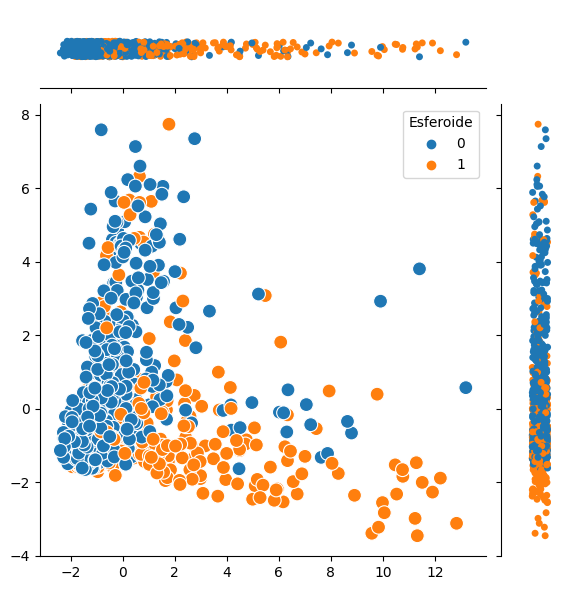

In [133]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
np.random.seed(0)

# Standarization
cols_to_project = ['Area',
                         'Perim.',
                         #'Width',
                         #'Height',
                         'Circ.',
                         'Feret',
                         'MinFeret',
                         'AR',
                         'Round',
                         'Solidity',
                         #'Esferoide',
                         'Diameter',
                         'n_diam']

df_standard = fiji_datos_encoded[cols_to_project].copy()

# Standardize the data
df_standard = (df_standard - df_standard.mean()) / df_standard.std()
pca = PCA(n_components=10)
pca.fit(df_standard)

print(f'Principal components {pca.components_[0]}')
print(f'Explained variance: {pca.explained_variance_}')
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

import seaborn as sns
import matplotlib.pyplot as plt

df_projected = pca.transform(df_standard)

g = sns.JointGrid(x=df_projected[:, 0], y=df_projected[:, 1],hue=fiji_datos_encoded['Esferoide'], height=6)
g.plot_joint(sns.scatterplot, s=100)
g.plot_marginals(sns.stripplot)
plt.show()



Se observa que los dos componentes principales explican más del 90% de la varianza (59,3 y 32,2 para los componentes 1 y 2, respectivamente), el tercer componente principal afecta la varianza con un orden de magnitud menor. Por lo tanto, se decide elegir los dos primeros componentes para ser agregados al set de datos.
  

In [134]:
# Creación del nuevo nuevo df con los componentes principales agregados en nuevas columnas
fiji_datos_encoded['pc1'] = df_projected[:, 0]
fiji_datos_encoded['pc2'] = df_projected[:, 1]

fiji_datos_encoded.head()

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam,pc1,pc2
0,Esferas_BT474_dia_0_well_2_100X_1_blob_34,315.6752,1027.9715,694.7215,1027.9715,694.7215,65.6036,1017.6630,684.7826,20.3804,...,20.1583,1.0130,0.9871,0.9513,1,0,20.87415,1.473866,-1.804907,-1.260129
1,Esferas_BT474_dia_0_well_1_100X_1_blob_8,333.6742,1123.7169,318.7621,1123.7169,318.7621,67.3603,1112.7717,309.1033,21.7391,...,19.7011,1.0531,0.9496,0.9557,1,0,20.80470,1.459204,-1.781630,-1.135276
2,Esferas_BT474_dia_0_well_2_100X_1_blob_3,505.3572,1649.6734,26.9633,1649.6734,26.9633,85.2847,1636.5489,14.2663,25.8152,...,25.5245,1.0173,0.9830,0.9387,1,0,26.85360,3.137900,-1.354712,-0.830658
3,Esferas_BT474_dia_0_well_2_100X_1_blob_8,874.1065,1596.3056,145.1846,1596.3056,145.1846,130.8776,1583.5598,123.6413,25.8152,...,25.8152,1.9705,0.5075,0.8983,0,0,35.42365,7.202967,0.067367,4.471457
4,Esferas_BT474_dia_0_well_2_100X_1_blob_23,302.7528,130.9940,453.8447,130.9940,453.8447,64.4780,121.6033,443.6141,19.0217,...,19.0217,1.0803,0.9256,0.9473,1,0,20.30050,1.355663,-1.781918,-0.799000


##### $5.$ Pueden identificar sesgos en la toma de los datos o en el etiquetado? Si les parece que es así, cómo sería un experimento o método para mejorarlos?

Un sesgo ya observado en el tp anterior es la cantidad de registros de esferoides = 'si' con respecto a la cantidad de esferoides = 'no' para cada día.

In [ ]:
fiji_datos_concat.groupby(["dia","Esferoide"]).size()

dia  Esferoide
0    no            20
     si            74
1    no            89
     si           256
2    no            85
     si            70
3    no            25
     si            18
4    no           207
     si            49
5    no            24
     si            28
6    no             2
     si             2
7    no            45
     si            29
dtype: int64

Como se visualiza en la tabla anterior, la cantidad de datos para esferoides = 'si' y para esferoides = 'no' dentro de un mismo día, es desigual. Además la cantidad de datos por día también está desbalanceada. Esto podría originar una falta de representación equitativa de los diferentes tipos de muestras en el conjunto de datos. Esto puede resultar en problemas al entrenar modelos de aprendizaje automático o al realizar análisis estadísticos, ya que los resultados pueden estar sesgados hacia la clase dominante y no generalizarse adecuadamente a casos menos representados.

Algunas estrategias para abordar este tipo de sesgo podrían ser recopilar datos adicionales o reequilibrar el conjunto de datos para igualar la cantidad de muestras de cada clase ya sea eliminando registros de la clase dominante o duplicando los de la minoritaria. Este último abordaje podría generar sesgos en el dataset.

Entrenar modelos que no sean sensibles al desbalance del dataset puede ser una solución efectiva para manejar este tipo de sesgo.

Otro sesgo posible pero difícil de identificar es si la persona experta responsable de clasificar las tumoresferas, podría tener sesgos preexistentes o suposiciones sobre las características o apariencia de las mismas. Esto puede llevar a una tendencia a clasificar las imágenes de acuerdo con esas expectativas preexistentes, en lugar de hacerlo de manera imparcial basándose únicamente en las características visuales de la tumoresfera en la imagen.

Para mejorar la posibilidad de este tipo de sesgo individual, se podrían emplear validaciones cruzadas o bien establecer protocolos detallados y claros que guíen el proceso de clasificación.

##### $6.$ Realizar una documentación técnica de los procesos realizados.

In [ ]:
#



### OPCIONAL

7) Explorar la carpeta *py_folder*. El archivo *main.py* es solo un borrador. Agregar alguna función de transformación en el módulo de eda y que puedan ejecutarla corriendo el archivo.

 Para correr el archivo main, en una terminal:

    (.venv) $ python main.py

 [Pdoc](https://pdoc.dev/) es una elección común para la documentación en Python. Para usarlo en este proyecto (está un poco personalizado):

    1) Instalarlo:
       (.venv) $ pip install pdoc
    2) Crear la carpeta con la documentación
       (.venv) $ pdoc main.py utils/ -o ./documentacion/Docs -t ./documentacion/pdoc_templates/
